In [2]:
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [11]:
df = pd.read_csv('penguins.csv')
df.head()



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [26]:
df = pd.read_csv('penguins.csv')
df.head()
df=df.drop('sex', axis=1)
df=df.dropna()
print(df)
#Standardize the data
scaler = StandardScaler()
df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]= scaler.fit_transform(df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']])
df

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g  
0         3750.0  
1         380

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,culmen_length_mm,culmen_depth_mm
0,Adelie,Torgersen,39.1,18.7,-1.418347,-0.564142,-0.884499,0.785449
1,Adelie,Torgersen,39.5,17.4,-1.062250,-0.501703,-0.811126,0.126188
2,Adelie,Torgersen,40.3,18.0,-0.421277,-1.188532,-0.664380,0.430462
4,Adelie,Torgersen,36.7,19.3,-0.563715,-0.938776,-1.324737,1.089724
5,Adelie,Torgersen,39.3,20.6,-0.777373,-0.689020,-0.847812,1.748985
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,0.433355,-0.251947,2.178824,1.343286
340,Chinstrap,Dream,43.5,18.1,0.077258,-1.001215,-0.077396,0.481175
341,Chinstrap,Dream,49.6,18.2,-0.563715,-0.532923,1.041543,0.531887
342,Chinstrap,Dream,50.8,19.0,0.647013,-0.127069,1.261662,0.937586


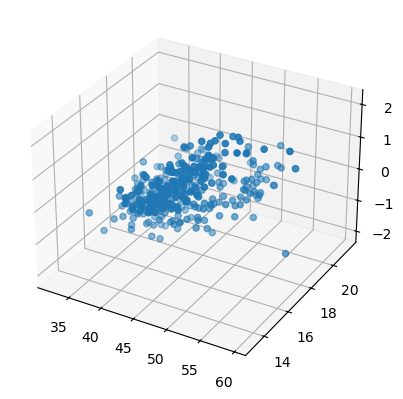

In [27]:
ax=plt.axes(projection="3d")
ax.scatter(df.bill_length_mm,df.bill_depth_mm,df.flipper_length_mm)
plt.show()

In [ ]:

# Initialize KMeans with 3 clusters
km = KMeans(n_clusters=3)

# Fit the KMeans model and predict cluster labels
y_predict = km.fit_predict(df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']])

# Get the cluster centers
centers = km.cluster_centers_
centers

In [45]:
df['cluster']=y_predict
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,culmen_length_mm,culmen_depth_mm,cluster
0,Adelie,Torgersen,39.1,18.7,-1.418347,-0.564142,-0.884499,0.785449,1
1,Adelie,Torgersen,39.5,17.4,-1.062250,-0.501703,-0.811126,0.126188,1
2,Adelie,Torgersen,40.3,18.0,-0.421277,-1.188532,-0.664380,0.430462,1
4,Adelie,Torgersen,36.7,19.3,-0.563715,-0.938776,-1.324737,1.089724,1
5,Adelie,Torgersen,39.3,20.6,-0.777373,-0.689020,-0.847812,1.748985,1
...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,0.433355,-0.251947,2.178824,1.343286,2
340,Chinstrap,Dream,43.5,18.1,0.077258,-1.001215,-0.077396,0.481175,0
341,Chinstrap,Dream,49.6,18.2,-0.563715,-0.532923,1.041543,0.531887,2
342,Chinstrap,Dream,50.8,19.0,0.647013,-0.127069,1.261662,0.937586,2


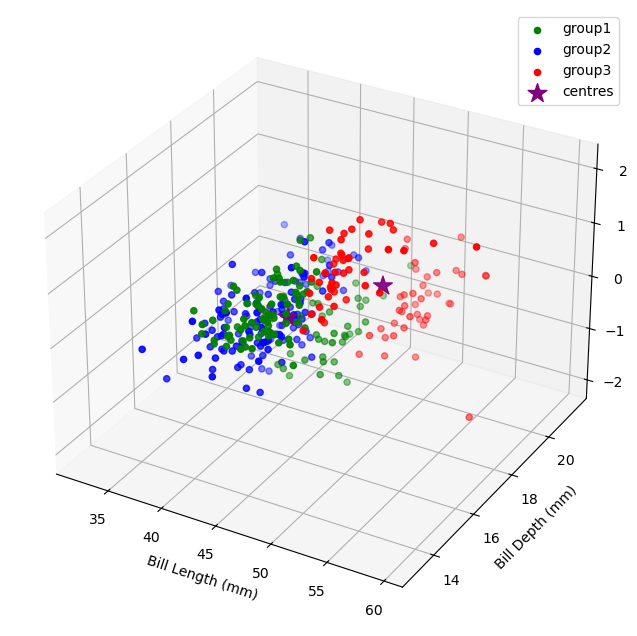

In [46]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df1['bill_length_mm'],df1['bill_depth_mm'],df1['flipper_length_mm'],color='green',label='group1')
ax.scatter(df2['bill_length_mm'],df2['bill_depth_mm'],df2['flipper_length_mm'],color='blue',label='group2')
ax.scatter(df3['bill_length_mm'],df3['bill_depth_mm'],df3['flipper_length_mm'],color='red',label='group3')
ax.scatter(centers[:,0],centers[:,1],centers[:,2],color='purple',label='centres',marker='*',s=200)
ax.set_xlabel('Bill Length (mm)')
ax.set_ylabel('Bill Depth (mm)')
ax.set_zlabel('Flipper Length (mm)')
plt.legend()
plt.show()